#**DATA MATH 361 Lab Assignment 3** by John Dominguez-Trujillo

*ALL CODE WAS DEVELOPED IN VISUAL STUDIO CODE AND PASTED INTO GOOGLE COLAB*

###**Activity 1:** Write Python code to make stacked bar charts for each of the seven categories in TwoWayTableOSS_MS.csv (Including the Total columns).

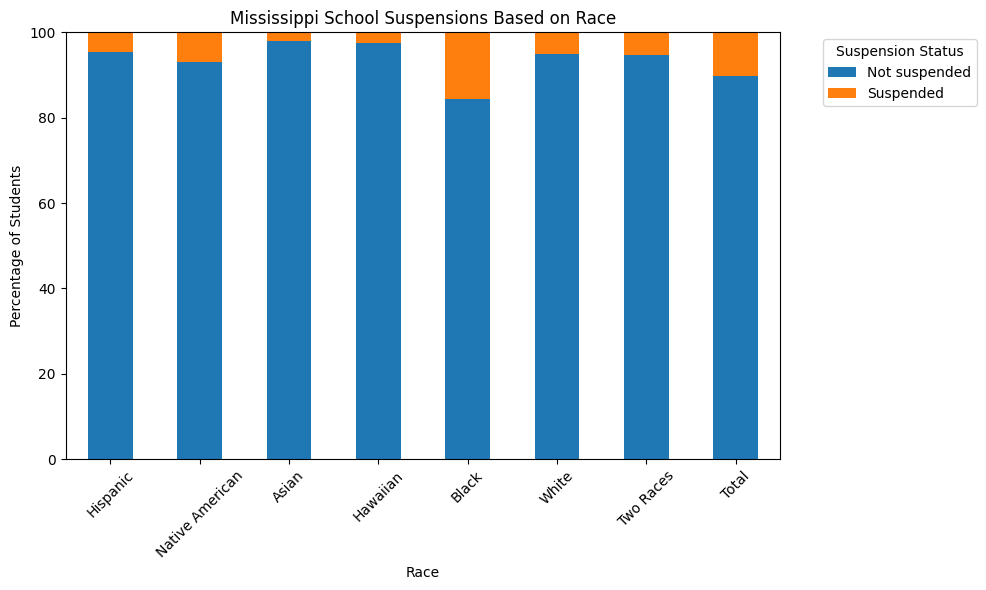

In [1]:
### Activity 1

## IMPORTS ESSENTIAL LIBRARIES
## PANDAS IS A LIBRARY USED FOR DATA MANIPULATION, ANALYSIS, AND DATA STRUCTURES
## MATPLOTLIB IS A PLOTTING LIBRARY THAT PROVIDES AN OBJECT-OREINTED API FOR DISPLAYING PLOTS
import pandas as pd
import matplotlib.pyplot as plt

## LOADS DATA FROM CSV INTO A VARIABLE
## USING A URL THAT LINKS DIRECTLY TO THE CSV FILE IN MY GITHUB SO ANYONE CAN ACCESS IT
url = 'https://raw.githubusercontent.com/JohnDT-MechE/DATA-MATH-361-Lab-Assignments/2b392369cdfa92927b351f6f749aca9cbd02a60d/Lab_Assignment_3/TwoWayTableOSS_MS.csv'
df = pd.read_csv(url)

## DROPNA() ENSURES ANY NaN DATA VALUES ARE REMOVED
df = df.dropna()

## SETS THE FIRST COLUMN OF THE DATAFRAME AS THE INDEX
## THIS ACTS AS THE LABELS FOR THE ROWS OF THE DATAFRAME
df.set_index(df.columns[0], inplace = True)

## TRANSPOSES THE DATA FOR PLOTTING
df = df.T

## CONVERTS NUMBER OF STUDENTS TO PERCENTAGE OF STUDENTS FOR BOTH SUSPENDED AND NOT SUSPENDED
df_percent = df.div(df.sum(axis = 1), axis = 0) * 100

## CREATES A FIGURE AND AN AXES
## FIG DEFINES A FIGURE WHERE A PLOT IS DRAWN
## AX DEFINES A SINGLE SUBPLOT WITHIN THE FIGURE WHERE THE DATA WILL BE PLOTTED
## PLT.SUBPLOT() RETURNS THE FIGURE AND AXES OBJECTS THAT ALLOWS FOR CONTROL OF THE PLOT
## FIGSIZE SETS THE SIZE OF THE FIGURE
fig, ax = plt.subplots(figsize = (10,6))

## PLOTS THE PERCENTAGE OF STUDENTS SUSPENDED AND NOT SUSPENDED AS A STACKED BAR PLOT
df_percent.plot(kind = 'bar', stacked = True, ax = ax)

## ADDS TITLE TO PLOT AND LABELS THE X AND Y AXIS OF THE PLOT
plt.title('Mississippi School Suspensions Based on Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Students')

## ROTATES THE LABELS ON THE X-AXIS BY 45 DEGREES
plt.xticks(rotation = 45)

## ADDS A LEGEND TO THE FIGURE AND SPECIFIES ITS EXACT LOCATION ON THE FIGURE
plt.legend(title = 'Suspension Status', bbox_to_anchor = (1.05, 1), loc = 'upper left')

## LIMITS THE Y-AXIS TO 100
plt.ylim(0,100)

## MATPLOTLIB FUNCTION THAT IS USED TO AUTOMATICALLY ADJUST SPACING BETWEEN PLOT ELEMENTS
## ENSURES THAT NO OVERLAPPING OR CLIPPING ISSUES OCCUR
plt.tight_layout()

## SHOWS THE PLOT IN THE FIGURE
plt.show()

###**Activity 2:** Write Python code to create a two-way table from Titanic.csv showing how many survived or died separated by Class and Sex.

In [2]:
### Activity 2

## IMPORTS ESSENTIAL LIBRARIES
## PANDAS IS A LIBRARY USED FOR DATA MANIPULATION, ANALYSIS, AND DATA STRUCTURES
import pandas as pd

## LOADS DATA FROM CSV INTO A VARIABLE
## USING A URL THAT LINKS DIRECTLY TO THE CSV FILE IN MY GITHUB SO ANYONE CAN ACCESS IT
url = 'https://raw.githubusercontent.com/JohnDT-MechE/DATA-MATH-361-Lab-Assignments/2b392369cdfa92927b351f6f749aca9cbd02a60d/Lab_Assignment_3/Titanic.csv'
df = pd.read_csv(url)

## CREATES A PIVOT TABLE SUMMARIZING SURVIVAL OUTCOMES BY CLASS AND SEX
## INDEX GROUPS DATA BY PASSENGER CLASS
## COLUMNS GROUPS DATA BY SEX AND OUTCOME
## AGGFUNC = 'SIZE' COUNTS THE NUMBER OF OCCURENCES IN EACH CATEGORY
## FILL VALUE ENSURES ANY MISSING VALUES ARE REPLACED WITH ZERO
outcome_table = df.pivot_table(
    index = 'Class',
    columns = ['Sex', 'Outcome'],
    aggfunc = 'size',
    fill_value = 0
)

## CALCULATES THE TOTAL NUMBER OF MALES
## SELECTS THE MALE COLUMN AND CALCULATES THE SUM ACROSS THE ROW (TOTAL MALES PER CLASS)
## CREATES A NEW COLUMN 'TOTAL MALES'
total_male = outcome_table['male'].sum(axis = 1)
outcome_table['Total Male'] = total_male

## CALCULATES THE TOTAL NUMBER OF FEMALES
## SELECTS THE FEMALE COLUMN AND CALCULATES THE SUM ACROSS THE ROW (TOTAL FEMALES PER CLASS)
## CREATES A NEW COLUMN 'TOTAL FEMALES'
total_female = outcome_table['female'].sum(axis = 1)
outcome_table['Total Female'] = total_female

## ADDS A TOTAL ROW ('TOTAL') AT THE BOTTOM THAT SUMS ALL COLUMNS
outcome_table.loc['total'] = outcome_table.sum()

## PRINTS THE FINAL PIVOT TABLE
print(outcome_table)

Sex     female          male          Total Male Total Female
Outcome   died survived died survived                        
Class                                                        
first        5      128   98       53        151          133
second      11       92  135       23        158          103
third       74       64  261       56        317          138
total       90      284  494      132        626          374
